<a href="https://colab.research.google.com/github/hfelizzola/Curso-Estadistica/blob/main/Ejercicio_Practica_Tercer_Corte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
# Para modelo de regresión
import statsmodels.api as sm
pd.set_option('display.max_columns',None)

In [2]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Estadistica')

In [32]:
# Verificar lista de archivos en directorio de trabajo
!ls

 cargos-servicios-salud.xlsx	        estatura_peso_clase.xlsx
'Copia de Intervalos_Confianza.ipynb'   movies.xlsx
 datos_clase.gsheet		        Regresion_Lineal.ipynb
 datos_regresion.xlsx		        Untitled0.ipynb
 Ejercicio-Practica-Tercer-Corte        W92S73-XLS-ENG.xlsx
 Estadisticas_Descriptivas.ipynb


## Ejercicio 5

In [33]:
df5 = pd.read_excel("cargos-servicios-salud.xlsx")
df5.head()

,edad,sexo,imc,hijos,fumador,region,cargos
0,19,mujer,27.900,0,si,suroccidente,16884.92
1,18,hombre,33.770,1,no,suroriente,1725.55
2,28,hombre,33.000,3,no,suroriente,4449.46
3,33,hombre,22.705,0,no,noroccidente,21984.47
4,32,hombre,28.880,0,no,noroccidente,3866.86


In [34]:
df5.describe()

,edad,imc,hijos,cargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422280
std,14.049960,6.098187,1.205493,12110.011272
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.296250,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.693750,2.000000,16639.915000
max,64.000000,53.130000,5.000000,63770.430000


In [38]:
# Modelo de Regresión Lineal
# Define la variable dependiente
y = df5['cargos']

# Define la variable independiente
x = df5[['edad', 'sexo', 'imc', 'hijos', 'fumador', 'region']]

x = pd.get_dummies(x, drop_first=True)
x

,edad,imc,hijos,sexo_mujer,fumador_si,region_nororiente,region_suroccidente,region_suroriente
0,19,27.900,0,1,1,0,1,0
1,18,33.770,1,0,0,0,0,1
2,28,33.000,3,0,0,0,0,1
3,33,22.705,0,0,0,0,0,0
4,32,28.880,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,0,0
1334,18,31.920,0,1,0,1,0,0
1335,18,36.850,0,1,0,0,0,1
1336,21,25.800,0,1,0,0,1,0


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.87 ,  7386.726, 13651.582, 19916.438, 26181.294, 32446.15 ,
        38711.006, 44975.862, 51240.718, 57505.574, 63770.43 ]),
 <BarContainer object of 10 artists>)

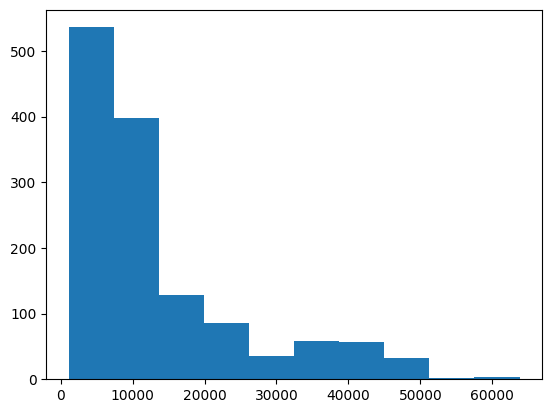

In [40]:
plt.hist(df5['cargos'])

In [39]:
# Agrega la constante
x = sm.add_constant(x)

# Ajusta el modelo de regresión
model = sm.OLS(y, x)
results = model.fit()

# Imprime un resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 cargos   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        14:19:49   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.242e+04   1

1. ¿Es significativo el modelo?

Dado que el valor p del modelo < 0.05, entonces se infiere el que el modelo de regresión es significativo.

2. ¿En porcentaje el modelo explica el comportamiento de los cargos medicos?

El modelo explica aproxidamente el 75.1% de los cargos medicos

3. Cuales la ecuación del modelo:

$$
cargos = -12420 + 256*edad + 339*imc + 475*hijos + sexomujer*131 + fumadorsi*23850 + region_nororiente*352 - region_suroccident*607 - region_suroriente*682 
$$

4. Cómo interpretar los coeficientes:

- edad: tiene un beta de 256. Esto quiere decir que por cada año adicional que tiene el asegurado sus gastos medicos aumentan en promedio 256 USD, cuando las demas variables permanencen constante.
- imc: tiene un beta de 339. Esto quiere decir que por cada unidad adicional en el imc, los gastos medicos aumentan en promedio 339 USD.

5. ¿Cuales variables tienen un efecto significativo en los cargos medicos?

Con un valor p inferior a 0.05 las variables significativas son:

- edad
- imc
- hijos
- fumador

In [45]:
# Define la variable independiente
x = df5[['edad', 'imc', 'hijos', 'fumador']]

x = pd.get_dummies(x, drop_first=True)
x

,edad,imc,hijos,fumador_si
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
1333,50,30.970,3,0
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [46]:
# Agrega la constante
x = sm.add_constant(x)

# Ajusta el modelo de regresión
model = sm.OLS(y, x)
results = model.fit()

# Imprime un resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 cargos   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Tue, 30 May 2023   Prob (F-statistic):               0.00
Time:                        14:37:51   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

In [48]:
# Comparar ventas estimadas vs ventas reales
cargos_estimados = results.fittedvalues
cargos_reales = y
pd.DataFrame({'Cargos Reales':cargos_reales, 'Cargos Estimados': cargos_estimados})

,Cargos Reales,Cargos Estimados
0,16884.92,25587.425304
1,1725.55,3880.946078
2,4449.46,7158.620203
3,21984.47,3713.900319
4,3866.86,5443.483340
...,...,...
1333,10600.55,12177.950900
1334,2205.98,2812.018608
1335,1629.83,4398.746113
1336,2007.94,1615.836422


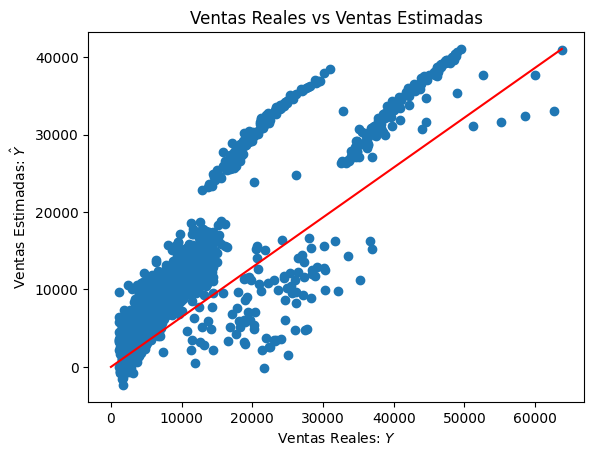

In [50]:
# Gráfica de ventas reales vs ventas estimadas
plt.scatter(x=cargos_reales, y=cargos_estimados)
plt.plot([0,np.max(cargos_reales)], [0,np.max(cargos_estimados)], color="red")
plt.title("Ventas Estimada vs Ventas Reales")
plt.xlabel(f"Ventas Reales: $Y$")
plt.ylabel(f"Ventas Estimadas: $\hat Y$")
plt.show()